# CIFAR10 LeNet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import sys
import seaborn as sns
%run ./plot_functions.ipynb
sys.path.insert(0, '../src/')

output_path =  ../output/figures
plt = single_column_plt_params(plt)


In [2]:
from analyze_utilities import *
from dataset_utilities import create_cifar10_dataloaders
plt = single_column_plt_params(plt)

Files already downloaded and verified
Files already downloaded and verified


## Load Data

In [3]:
files_lenet = [
    '../output/pnml_cifar10_lenet_results_20190517_082643/results_pnml_cifar10_lenet_20190517_082643.json',
    '../output/pnml_cifar10_lenet_results_20190517_082659/results_pnml_cifar10_lenet_20190517_082659.json',
    '../output/pnml_cifar10_lenet_results_20190517_082709/results_pnml_cifar10_lenet_20190517_082709.json',
    '../output/pnml_cifar10_lenet_results_20190517_082734/results_pnml_cifar10_lenet_20190517_082734.json',
    '../output/pnml_cifar10_lenet_results_20190517_082746/results_pnml_cifar10_lenet_20190517_082746.json',
    '../output/pnml_cifar10_lenet_results_20190517_082820/results_pnml_cifar10_lenet_20190517_082820.json',
    '../output/pnml_cifar10_lenet_results_20190517_082832/results_pnml_cifar10_lenet_20190517_082832.json',
    '../output/pnml_cifar10_lenet_results_20190517_082844/results_pnml_cifar10_lenet_20190517_082844.json',
    '../output/pnml_cifar10_lenet_results_20190517_082856/results_pnml_cifar10_lenet_20190517_082856.json',
    '../output/pnml_cifar10_lenet_results_20190517_082906/results_pnml_cifar10_lenet_20190517_082906.json',
]

In [4]:
# Load svhn and noise
result_df, statistic_df = load_results_to_df(files_lenet)
print('Cifar10 Lenet: loaded %d keys' % result_df.shape[0])
print('Regret ', result_df['log10_norm_factor'].mean())
print(statistic_df.round(3).T)
print('is_correct: [pnml ERM]=[{} {}]'.format(result_df['nml_is_correct'].sum(),
                                              result_df['erm_is_correct'].sum()))

Cifar10 Lenet: loaded 10000 keys
Regret  0.1615753115775302
         acc  mean loss  std loss  mean entropy
nml    0.585      0.546     0.597         0.471
erm    0.587      0.640     0.949         0.313
genie  0.700      0.384     0.571         0.306
is_correct: [pnml ERM]=[5850 5870]


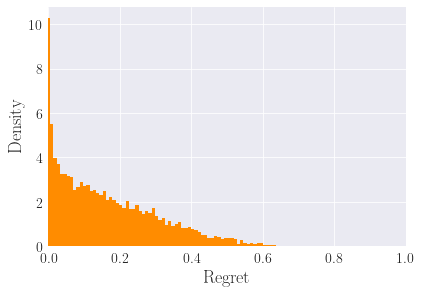

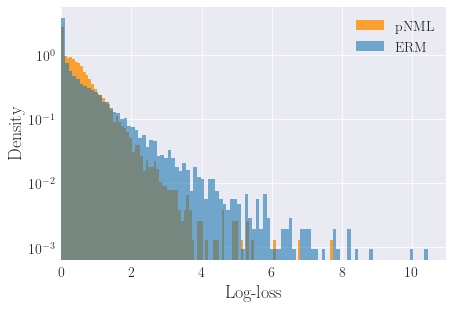

In [5]:
# Regret histogram
bins = 100
plt.hist(result_df['log10_norm_factor'], density=True,
         label='pNML', bins=bins, color='darkorange')
plt.xlim([-0.0001, 1])
plt.title('Regret Histogram') if is_plot_title else None
plt.xlabel('Regret')
plt.ylabel('Density')
# plt.savefig(os.path.join(output_path, 'figure_regret_hist.jpg'), dpi=200,
#             bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

# logloss histogram
bins = 100
plt.hist(result_df['nml_loss'], bins=bins, alpha=0.8,
         label='pNML', density=True, color='darkorange')
plt.hist(result_df['erm_loss'], bins=bins,
         alpha=0.6, label='ERM', density=True)
plt.title('Logloss Histogram') if is_plot_title else None
plt.xlabel('Log-loss')
plt.ylabel('Density')
plt.yscale('log')
plt.xlim(left=0)
plt.legend()
plt.savefig(os.path.join(output_path, 'figure_logloss_hist_lenet.pdf'), dpi=300,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

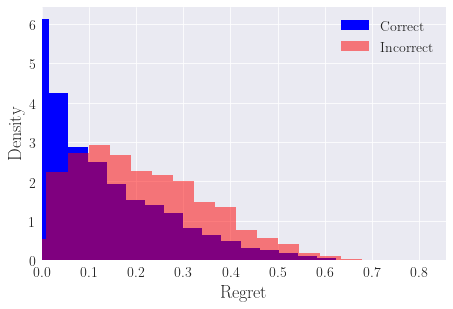


Correct = 5850, Incorrect = 4150 
Mean [correct, incorrect]=[0.1256076512143844, 0.21227671233039827]


In [6]:
# Plot histogram of correct vs incorrect
correct_norm_factor = result_df['log10_norm_factor'][result_df['nml_is_correct'] == True]
incorrect_norm_factor = result_df['log10_norm_factor'][result_df['nml_is_correct'] == False]

bins = 20

plt.hist(correct_norm_factor, alpha=1, bins=bins,
         density=True, color='blue', label='Correct')
plt.hist(incorrect_norm_factor, alpha=0.5, bins=bins,
         density=True, color='red', label='Incorrect')
plt.xlim(left=0.0)
plt.title(
    'Regret Histogram with Correct and Incorrect Separation') if is_plot_title else None
plt.xlabel('Regret')
plt.ylabel('Density')
plt.legend()
plt.savefig(os.path.join(output_path, 'figure_correct_incorrect_hist_lenet.pdf'), dpi=300,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

print()
print('Correct = %d, Incorrect = %d ' %
      (correct_norm_factor.shape[0], incorrect_norm_factor.shape[0]))
print('Mean [correct, incorrect]={}'.format(
    [correct_norm_factor.mean(), incorrect_norm_factor.mean()]))

# Regret based classifer

In [7]:
#  Construct best loss based on normalization factor
threshold_list = np.linspace(np.finfo(float).eps, 1, 99)
acc_list = []
acc_erm_list = []
cdf_list = []
nml_thresh_loss_list = []
erm_thresh_loss_list = []
for threshold in threshold_list:
    df = result_df[result_df['log10_norm_factor'] < threshold]

    # loss
    nml_thresh_loss_list.append(df['nml_loss'].mean())
    erm_thresh_loss_list.append(df['erm_loss'].mean())

    # Acc
    acc_single = np.sum(df['nml_is_correct'] == True) / \
        (df.shape[0] + np.finfo(float).eps)
    acc_list.append(acc_single)
    acc_erm_single = np.sum(df['erm_is_correct'] == True) / \
        (df.shape[0] + np.finfo(float).eps)
    acc_erm_list.append(acc_erm_single)

    cdf_single = df.shape[0] / result_df.shape[0]
    cdf_list.append(cdf_single)

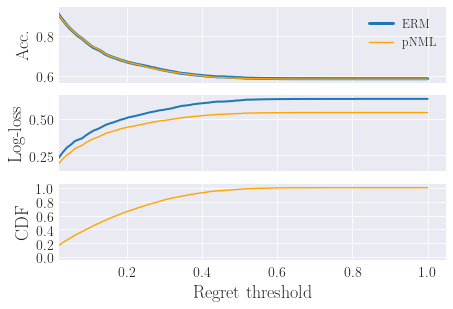

,CDF,Regret thresh,acc,log-loss
0,0.0086,2.220446e-16,0.662791,0.366643
1,0.1314,1.020408e-02,0.923896,0.163692
2,0.1765,2.040816e-02,0.899717,0.197920
3,0.2143,3.061224e-02,0.873542,0.227365
4,0.2480,4.081633e-02,0.852419,0.253289
5,0.2816,5.102041e-02,0.832386,0.271951
6,0.3142,6.122449e-02,0.814768,0.294564
7,0.3439,7.142857e-02,0.799360,0.308808
8,0.3716,8.163265e-02,0.784984,0.320137
9,0.4003,9.183673e-02,0.768673,0.338599


In [8]:
fig, axs = plt.subplots(3, sharex=True)

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
# Acc
acc_color = 'royalblue'
ax1.plot(threshold_list, acc_erm_list, '-',
         label='ERM', color='C0',  linewidth=3)
ax1.plot(threshold_list, acc_list, label='pNML', color='orange')
ax1.set_ylabel('Acc.')
ax1.legend(fontsize=12)


# Loss
loss_color = 'green'
ax2.plot(threshold_list, erm_thresh_loss_list, '-',
         label='ERM', color='C0',  linewidth=2)
ax2.plot(threshold_list, nml_thresh_loss_list, label='pNML', color='orange')
ax2.set_ylabel('Log-loss')
labels = [item.get_text() for item in ax2.get_xticklabels()]

# CDF
ax3.plot(threshold_list, cdf_list, color='orange')
ax3.set_yticks(np.linspace(0, 1, 6))
ax3.set_xlabel('Regret threshold')
ax3.set_ylabel('CDF')

# Save and show
plt.xlim(left=0.02)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'figure_regret_based_classifier_lenet.pdf'),
            dpi=300, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

pd.DataFrame(
    {'CDF': cdf_list, 'Regret thresh': threshold_list, 'acc': acc_list, 'log-loss': nml_thresh_loss_list})